# Regression 

## Introduction: 
The insurer needs access to previous data to estimate each user's medical expenses in order to create the best medical insurance packages.  A medical insurer can use this information to plan a specific insurance outcome, manage large portfolios, or create more accurate pricing models.  Accurately estimating insurance costs is the goal in each of these situations.


## Dataset: 
1,339 medical insurance records are included in this dataset.  The **target** variable **charges** are the individual medical expenses that are invoiced by health insurance; the remaining columns include personal data, like age, gender, family status, and if the patient smokes, among other characteristics.

**Columns**
- `age`: age of primary beneficiary
- `sex`: insurance contractor gender, female, male
- `bmi`: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
- `children`: Number of children covered by health insurance / Number of dependents
- `smoker`: Smoking
- `region`: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
- `charges`: Individual medical costs billed by health insurance => This is my target.

In [97]:
import pandas as pd
import numpy as np

In [99]:
insurance=pd.read_csv('./Dataset/insurance.csv')

---
Next will show the first 5 samples in the dataset

In [103]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


---
Show the last 5 samples in the dataset

In [106]:
insurance.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


---
the dataset have a `1338 sample` each sample have a `7 features`.

In [109]:
insurance.shape

(1338, 7)

---
We have to check if our dataset have a `null` values.

In [115]:
insurance.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

there is no `null` values so we will not drop a column

---

Now we will describe the dataset

In [101]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


----
We will observe here the data type for each feature; and each non numeric values we have to encode it into a numeric form to be understandable for our model.

In [147]:
insurance.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [113]:
insurance['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

---
`pd.get_dummies()` is a Pandas function used to convert categorical variables into dummy/indicator variables (also known as one-hot encoding).

It creates new binary columns for each category (e.g., `sex_male`, `smoker_yes`, `region_northwest`, etc.).

`columns=catColumns` tells it to apply this transformation only to the `sex`, `smoker`, and `region` columns.

`drop_first=True` avoids the dummy variable trap (multicollinearity in regression) by dropping the first category of each column. For example:

Instead of creating both `sex_female` and `sex_male`, it might only create `sex_male`. If `sex_male` is 0, it means the person is female.

Similarly, it drops the first value for each categorical column.

region has four categories: `southeast`, `southwest`, `northwest`, and `northeast`. So `get_dummies()` creates one column for each category

In [118]:
catColumns = ['sex', 'smoker', 'region']
insurance_dum = pd.get_dummies(insurance, columns = catColumns, drop_first=True)
insurance_dum.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


----
### Data visualization

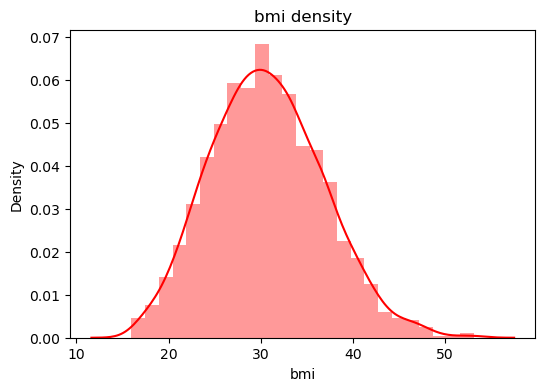

In [243]:
import matplotlib.pyplot as plt
import seaborn as sns 

plt.figure(figsize=(6,4))
sns.distplot(insurance.bmi,color='red')
plt.title('bmi density')
plt.show()

----

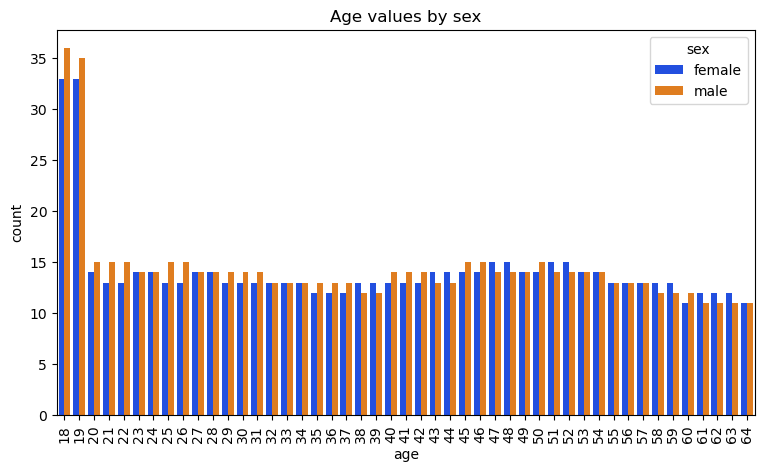

In [233]:
sns.set_palette('bright')
plt.figure(figsize=(9,5))
sns.countplot(x='age',hue='sex' ,data=insurance)
plt.title('Age values by sex')
plt.xticks(rotation=90)
plt.show()

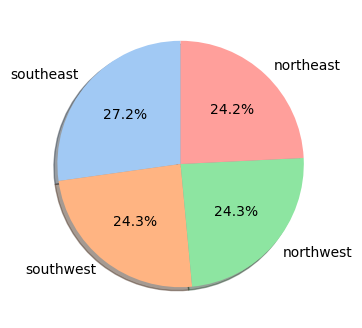

In [219]:
region=insurance['region'].value_counts()

labels=region.index
sizes=region.values
plt.figure(figsize=(6,4))
colors=sns.color_palette('pastel')
plt.pie(sizes,labels=labels,autopct='%1.1f%%',
        shadow=True,colors=colors,startangle=90)
plt.show()

---

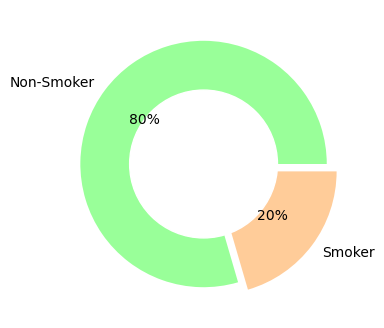

In [235]:
plt.figure(figsize=(6,4))
labels=['Non-Smoker','Smoker']
size=insurance['smoker'].value_counts()
colors=['#99ff99','#ffcc99']
explode=(0,0.1)
plt.pie(size,labels=labels,colors=colors,explode=explode,autopct='%2.f%%')
circle = plt.Circle( (0,0),0.6, color='white')
p=plt.gcf()
p.gca().add_artist(circle)
plt.show()

---

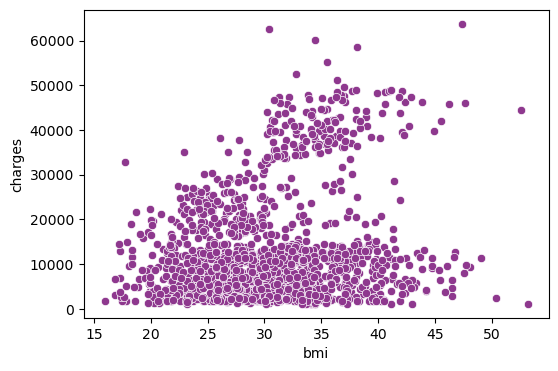

In [237]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='bmi',y='charges',data=insurance,color='#8E388E')
plt.show()

---
### find outliers

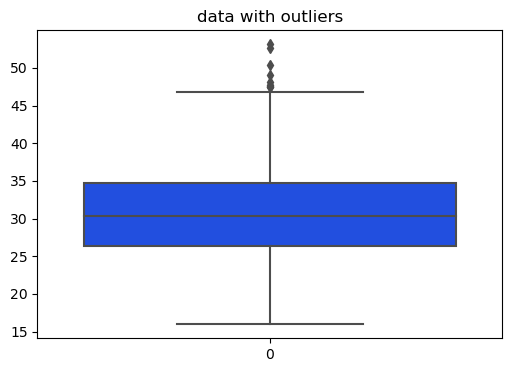

In [239]:
plt.figure(figsize=(6,4))
sns.boxplot(insurance['bmi'])
plt.title('data with outliers')
plt.show()

---

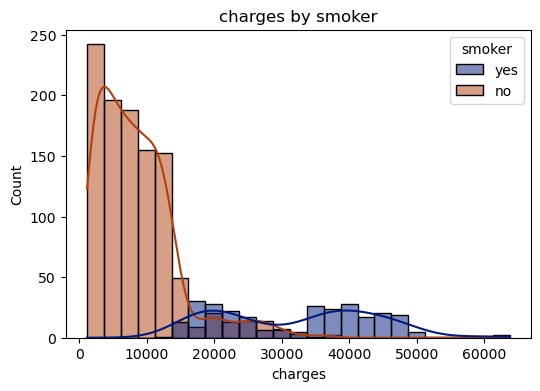

In [241]:
fig, ax1 = plt.subplots(figsize=(6,4))
sns.set_palette('dark')
sns.histplot(data = insurance, x='charges', ax=ax1, bins=25, hue='smoker', kde=True)
plt.title('charges by smoker')
plt.show()

---
## Methodology

### Requirements:
You should write your code to investigate the following: 
- A  The impact of altering the cost function in linear regression.  
        As you should write your own linear regression model and gradient descent code, you will compare the different reported cost functions:

   -  $ J(\theta) = \frac{1}{2} \sum_{i=1}^{m} \left( y^{(i)} - h_\theta(x^{(i)}) \right)^2 $
   -  $ J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} \left( y^{(i)} - h_\theta(x^{(i)}) \right)^2 $


-  The impact of learning rate on the training process 
Try the learning rates ( $\alpha$) listed below, plot the value of $ J(\theta)$ after each 
iteration and compare these plots and comment on them.

      $\alpha$ = {0.0001, 0.001, 0.01, 0.1, 1, 10, 100} 
-  Your linear regression model vs sklearn 
Compare your best model's performance with sklearn  
D)  Regularized linear regression  
Implement one of the regularization techniques on your linear regression 
model 
-  Compare your results with any other regressor of your choice (You can use a 
library regressor in this part) 
F)  Use a polynomial regression of any degree/transformation you choose. 
Discuss the performance with your model and sklearn in C). 